**Project 02**

**Prediction Using Unsupervised Machine Learning**

Predict the optimum number of clusters and represent it visually

**K-Means Clustering**

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Load dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Finding the optimum number of clusters for k-means classification**

In [3]:
x= iris_data.iloc[:,[1,2,3]].values
print(x)

[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.2]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.6 1.4 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.1 4.4 1.4]
 [3.  4.5 

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

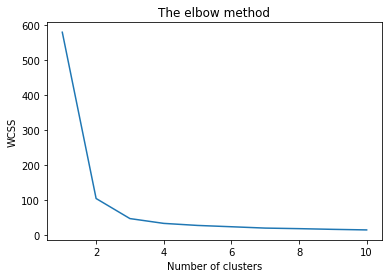

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called **'The elbow method'** from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)



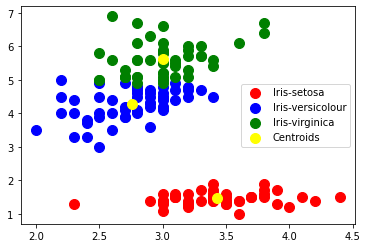

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()